In [ ]:
import sys
!{sys.executable} -m pip install pythainlp
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install attacut

In [31]:
from pythainlp import sent_tokenize, word_tokenize
from pythainlp.summarize import summarize
import multidict as multidict
import re
import pythainlp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [32]:
text = """
“พร้อมฉีดวัคซีนปูพรม เพื่อเดินหน้าประเทศไทย”
สัปดาห์ที่ผ่านมา เราพบว่าสถานการณ์โควิดในกรุงเทพและปริมณฑล ยังอยู่ในระดับที่ทรงตัว แม้ว่าเราจะสามารถลดจำนวนผู้ติดเชื้อในบางพื้นที่ แต่ก็ยังมีคลัสเตอร์ใหม่เกิดขึ้นมาอีก ทำให้ผมต้องเรียกประชุมผู้บริหารกระทรวงสาธารณสุขเป็นการด่วนในช่วงเช้าของเมื่อวานนี้ เพื่อรับทราบข้อมูลล่าสุดและหาทางแก้สถานการณ์ที่เกิดขึ้นให้ได้เร็วที่สุด ซึ่งผลของการประชุมสรุปได้ว่า จะเร่งแก้ไขปัญหาการติดเชื้อในเรือนจำต่างๆ ทั่วประเทศ โดยจะดำเนินการตรวจเชิงรุกให้ได้มากและเร็วที่สุด และจัดตั้งโรงพยาบาลสนามภายในเรือนจำ เพื่อคัดแยกผู้ป่วยออกมารักษา หากมีผู้มีอาการรุนแรง ก็จะนำออกมาเข้ารักษาในโรงพยาบาลเฉพาะทางตามระบบต่อไป โดยเราจะให้การดูแลรักษาผู้ที่ติดเชื้ออย่างดีที่สุดด้วยความเท่าเทียม ซึ่งเรือนจำแต่ละแห่งเป็นระบบปิด จึงมีโอกาสที่จะแพร่กระจายเชื้อสู่ชุมชนได้น้อยมาก และผมได้สั่งการให้เจ้าหน้าที่ที่เกี่ยวข้องคอยดูแลเข้มงวดในเรื่องนี้ ในช่วงที่มีการระบาด     โดยจะไม่ให้มีการเข้าเยี่ยมจากภายนอก จนกว่าสถานการณ์จะดีขึ้น
ส่วนในพื้นที่อื่นๆ ในกรุงเทพและปริมณฑล เราจะยังเดินหน้าต่อไปในแนวทางที่เราทำสำเร็จมาแล้ว คือการระดมตรวจเชิงรุก คัดแยกผู้ป่วย ส่งตัวรักษา และระดมฉีดวัคซีนในพื้นที่เสี่ยง ซึ่งต้องควบคู่ไปกับการบังคับใช้มาตรการป้องกันอย่างเคร่งครัด นั่นคือการใส่แมสก์ทุกครั้งที่ออกจากบ้าน การเว้นระยะห่าง และการตรวจวัดอุณหภูมิในทุกสถานที่ ซึ่งการระบาดในขณะนี้ เกิดขึ้นจากพื้นที่ที่มีการรวมตัวกันอย่างแออัด ผมจึงได้สั่งการให้ทางศบค. เร่งออกตรวจพื้นที่ที่มีโอกาสเสี่ยงเหล่านี้ ไม่ว่าจะเป็นแคมป์คนงานก่อสร้าง โรงงาน และสถานที่อื่นๆในกรุงเทพทั้งหมด ซึ่งสถานที่ที่เกิดการระบาด รวมทั้งในเรือนจำ เราจะใช้แนวทาง Bubble and Seal คือการปิดกั้นการเดินทางเข้าออกของคนในสถานที่นั้นๆ เพื่อไม่ให้เชื้อแพร่กระจายออกไปสู่ภายนอก ซึ่งการที่สถานที่ที่มีการแพร่กระจาย ส่วนใหญ่เป็นพื้นที่ปิด ทำให้ทีมแพทย์เชื่อว่าจะสามารถควบคุมสถานการณ์ได้โดยเร็ว โดยมีการประเมินสถานการณ์อย่างใกล้ชิดวันต่อวัน
แต่ถึงแม้ว่าสถานการณ์ในขณะนี้ยังคงทรงตัว แต่สิ่งที่เราต้องให้กำลังใจเจ้าหน้าที่ทุกคน ก็คือ เรามีจำนวนผู้ป่วยที่หายป่วยในแต่ละวันเป็นจำนวนมาก จนถึงวันนี้มีเกือบ 7 หมื่นคนแล้ว เฉพาะระลอกนี้มีมากกว่า 4 หมื่นคน หรือประมาณครึ่งหนึ่งของผู้ติดเชื้อ ซึ่งเป็นผลมาจากความสามารถของบุคลการทางการแพทย์ของเรา ที่คัดแยกตามอาการและรักษาอย่างดี และการเตรียมความพร้อมด้านอุปกรณ์และเตียงจากหน่วยงานที่เกี่ยวข้อง 
อีกหนึ่งประเด็นที่สำคัญที่ผมและรัฐบาลให้ความสำคัญเป็นอย่างยิ่ง ก็คือการฉีดวัคซีน ที่ผมได้ประกาศให้เป็นวาระแห่งชาติ ซึ่งทางรัฐบาลมีแผนการกระจายวัคซีนใน 3 ช่องทาง ช่องทางแรกคือ ผ่านระบบหมอพร้อม ที่มีผู้มาลงทะเบียนแล้วประมาณ 7 ล้านคน สำหรับผู้สูงอายุและผู้ป่วยเรื้อรัง 7 กลุ่มโรค และจะเปิดให้กลุ่มผู้อายุต่ำกว่า 60 ปีลงทะเบียนได้ในวันที่ 31 พฤษภาคมนี้ ซึ่งข้อดีคือ ผู้ลงทะเบียนสามารถจองคิวฉีดวัคซีนที่โรงพยาบาลที่เลือกในวันเวลาที่เลือกเอง และรับรองว่าจะได้ฉีดในวันเวลาดังกล่าว   อย่างแน่นอน สามารถเตรียมความพร้อมได้ดี หรืออาจจะเป็นระบบอื่นของแต่ละจังหวัด เช่นภูเก็ตชนะ ก็ได้  
ช่องทางที่สอง คือวิธีที่เสริมจากช่องทางระบบหมอพร้อม เพื่อให้ประชาชนได้รับวัคซีนมากที่สุด เร็วที่สุด คือลงทะเบียนที่จุดบริการฉีดวัคซีน หรือ “On-site Registration” ในกรณีที่มีวัคซีนสนับสนุนเพียงพอ ณ จุดบริการนั้น ซึ่งจะมีการพิจารณาจัดเตรียมระบบในช่องทางนี้เพื่อให้เกิดความพร้อมมากที่สุดในการจัดสรร
ส่วนช่องทางที่สาม คือการกระจายวัคซีนเชิงยุทธศาสตร์ นั่นคือการจัดสรรฉีดวัคซีนให้กับ  กลุ่มเฉพาะ คือประชาชนกลุ่มเฉพาะเสี่ยง กลุ่มที่มีความจำเป็นพิเศษ หรือมีความสำคัญต่อระบบเศรษฐกิจและการดำเนินชีวิตของประชาชน เช่น บุคลากรทางการแพทย์ บุคลากรด่านหน้า อสม. ทหาร ตำรวจ ข้าราชการ พนักงานด้านการบิน ครู อาจารย์ ผู้ขับขี่รถยนต์และจักรยานยนต์สาธารณะ พนักงานรถไฟและรถไฟฟ้า พนักงานในโรงแรม คณะผู้แทนการทูตและองค์กรระหว่างประเทศ นักธุรกิจและนักเรียน นักศึกษาที่ต้องเดินทางไปต่างประเทศ บุคลากรในโรงงาน คนพิการ พนักงานภาคบริการอาหารและยา และกลุ่มอื่นๆ ซึ่งจำเป็นต้องฉีดเพื่อให้การดำเนินชีวิตและเศรษฐกิจไทยสามารถเดินหน้าไปได้โดยไม่สะดุด ซึ่งกลุ่มบุคคลหรือสมาคมใดมีเหตุผลความจำเป็นเร่งด่วน สามารถที่จะยื่นเรื่องให้กับกระทรวงสาธารณสุขพิจารณาเพื่อจัดสรรวัคซีนและจัดเตรียมสถานที่ฉีดต่อไป 
เรามีเป้าหมายว่า จะระดมฉีดวัคซีแบบปูพรม ให้กับประชาชนในกรุงเทพ ซึ่งเป็นพื้นที่เสี่ยงสูง และเป็นศูนย์กลางเศรษฐกิจของประเทศ ให้ได้อย่างน้อย 5 ล้านคน หรือ 70% ของประชากรเพื่อสร้างภูมิคุ้มกันหมู่ให้ได้ภายใน 2 เดือน คือเดือนมิถุนายน และกรกฎาคม ซึ่งนอกจากโรงพยาบาลและจุดฉีดหลักแล้ว ยังมีจุดฉีดวัคซีนเสริมอีกอย่างน้อย 25 จุด กระจายทั่วกทม. รวมถึงสถานีกลางบางซื่อ เพื่อให้ประชาชนที่หาเช้ากินค่ำ และแรงงานต่างๆเข้าถึงวัคซีนได้สะดวกและรวดเร็ว
ที่ผ่านมา การวางระบบการฉีดวัคซีนอาจมีปัญหาติดขัดบ้าง หรือเกิดความไม่ชัดเจนบ้าง จากการให้ความสนใจลงทะเบียนเป็นจำนวนมาก และการวางแผนเพื่อให้เกิดประสิทธิภาพตรงเป้าหมายของประเทศมากที่สุด ผมได้ติดตามและเร่งรัดให้มีการปรับปรุงโดยรวดเร็ว ต้องขออภัยที่อาจทำให้เกิดความไม่สะดวกบ้าง แต่ผมขอยืนยันว่าทุกคนในประเทศไทยจะต้องได้รับการฉีดวัคซีนอย่างแน่นอน เรามีวัคซีนที่มีประสิทธิภาพสูง มากเพียงพอ และจะเริ่มให้บริการพร้อมกันทั่วประเทศในต้นเดือนมิถุนายนนี้อย่างแน่นอน โดยจากที่ผ่านมา เราเร่งฉีดให้บุคลากรทางการแพทย์และกลุ่มเสี่ยงไปแล้วมากกว่าสองล้านสามแสนโดส ได้ผลเป็นอย่างดี และไม่มีใครเกิดผลข้างเคียงร้ายแรงเลยแม้แต่คนเดียว จึงขอให้ท่านมีความมั่นใจได้
ในมาตรการการป้องกันการแพร่ระบาดและมาตรการผ่อนคลาย ที่วันนี้มีผลบังคับใช้แล้ว เช่นการอนุญาตให้พื้นที่สีแดงเข้มนั้นสามารถนั่งทานอาหารได้ร้านได้ โดยจำกัดจำนวนคน เป็นความพยายามในการช่วยเหลือพี่น้องประชาชนในระบบธุรกิจร้านอาหาร ซึ่งมีจำนวนมาก และกระทบกับวิถีชีวิตประจำวันของผู้คน โดยผ่านการพิจารณาจากคณะที่ปรึกษาอย่างรอบคอบ และต้องมีการบังคับใช้มาตรการป้องกันโรคอย่างเข้มงวด เช่นการจำกัดคนไม่เกิน 1 ใน 4 และเว้นระยะห่าง หากพบว่าร้านใดไม่ดำเนินการตามมาตรการ จะสั่งปิดในทันที หรือมีการทบทวนมาตรการ จึงขอให้เจ้าของร้านอาหารทุกร้านในกรุงเทพและปริมณฑลดำเนินการอย่างเข้มงวด และเจ้าหน้าที่คอยดูแลควบคุมอย่างใกล้ชิดด้วย 
นอกจากนี้ ผมยังได้สั่งการให้กระทรวงกลาโหม และกองทัพไทย ควบคุมการลักลอบเข้าประเทศจากชายแดนอย่างเข้มงวดสูงสุด หากพบว่ามีเจ้าหน้าที่หรือบุคคลใดที่แสวงหาผลประโยชน์บนความเสี่ยงของประเทศชาติ ต้องลงโทษให้หนักที่สุดโดยไม่มีการยกเว้น 
ผมขอเน้นย้ำว่าในวันนี้ การฉีดวัคซีน เป็น “วาระแห่งชาติ” ที่จะต้องเร่งดำเนินการ เพื่อให้ทุกอย่างขับเคลื่อนต่อไปได้ นโยบายของผม คือเราต้องเดินหน้าปูพรมฉีดวัคซีนเข็มแรกให้เร็ว และให้ถึงประชาชนจำนวนมากที่สุดเท่าที่จะทำได้ หลังจากได้รับความความเห็นของประชาชนจำนวนมาก ผมจึงได้ตัดสินใจว่า เราจะไม่รอให้คนวัยใดวัยหนึ่ง กลุ่มใดกลุ่มหนึ่ง ได้รับวัคซีนจนครบก่อน จึงค่อย   เปิดให้คนกลุ่มอื่นๆได้รับวัคซีน แต่เราจะปรับแผนการเดินหน้าประเทศ ด้วยการเปิดโอกาสให้ทุกคนที่พร้อมฉีดวัคซีน ไม่ว่าจะเป็นวัยใด เข้าถึงวัคซีนได้ โดยเฉพาะวัยทำงาน เพื่อปกป้องคนทำมาหากิน คนที่เป็นกำลังหลักในการหาเลี้ยงคนในบ้าน ให้ออกจากบ้านไปทำงาน ทำมาหาเลี้ยงชีพ และเดินหน้าชีวิตกันต่อไปได้ 
เพราะเราจะเอาชนะโควิดได้ก็ด้วยการเดินหน้าไปพร้อมๆกัน โดยไม่ทิ้งใครไว้ข้างหลัง ช่วยกันทำหน้าที่ของแต่ละคนให้ดีที่สุด ดูแลซึ่งกันและกันให้ดีที่สุด เพื่อขับเคลื่อนประเทศไทยให้ไปต่อได้ เราจะสู้ไปด้วยกันประเทศไทยต้องดีขึ้น ด้วยความร่วมมือร่วมใจ ความรักสามัคคี ของคนไทยด้วยกัน
เพราะเราทุกคนก็คือ #ทีมประเทศไทย
"""

In [34]:
summarize(text,n=3)

['สามารถที่จะยื่นเรื่องให้กับกระทรวงสาธารณสุขพิจารณาเพื่อจัดสรรวัคซีนและจัดเตรียมสถานที่ฉีดต่อไป',
 'เพื่อเดินหน้าประเทศไทย”',
 'เราเร่งฉีดให้บุคลากรทางการแพทย์และกลุ่มเสี่ยงไปแล้วมากกว่าสองล้านสามแสนโดส']

In [27]:
tokens = word_tokenize(text, keep_whitespace=False)

In [28]:
keywords = multidict.MultiDict()
tmpdict = {}

for text in tokens:
    if(text in pythainlp.corpus.common.thai_stopwords() or re.match('[0-9]+|\-|\.',text)):
        continue
    val = tmpdict.get(text, 0)
    tmpdict[text.lower()] = val + 1
for key in tmpdict:
    keywords.add(key, tmpdict[key])

In [29]:
prayuth_mask = np.array(Image.open('./images/20210518-mask.png'))

wordcloud = WordCloud(font_path='BaiJamjuree-Regular.woff',
                      background_color="white",
                      width=4096,
                      height=2160,
                      max_words=200,
                      collocations=False,
                      stopwords=list(pythainlp.corpus.common.thai_stopwords()),
                      mask=prayuth_mask)

wordcloud.generate_from_frequencies(keywords)

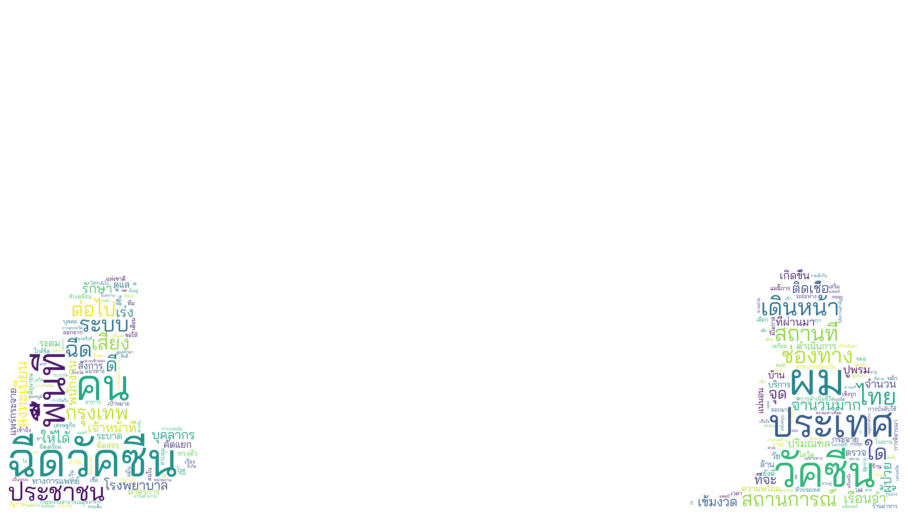

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.savefig('./images/20210518-output.png')